In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('data_banknote_authentication.txt')

In [3]:
col = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
data.columns = col

In [4]:
data['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

In [5]:
X = data.iloc[:,[0,1,2,3]].values
y = data.iloc[:,4].values
print(y)

[0 0 0 ... 1 1 1]


In [6]:
#normalise the features to a common scale
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_minmax,y,test_size=0.2, stratify=y, random_state = 44)

<AxesSubplot:ylabel='count'>

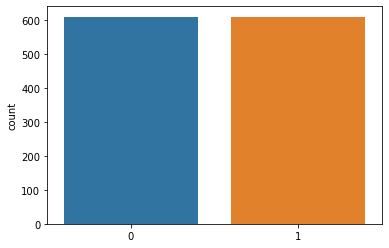

In [8]:
#balancing features
resampler = SMOTE(random_state=2)
X_train_smote, y_train_smote = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_smote)

# ANN Model

### Unbalanced data

In [9]:
#instantiating the model and adding layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4,activation='relu',input_shape=(4,)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [10]:
#compile the ANN
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics='accuracy')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [12]:
#fitting the ANN using normalized data
class_weights = {0:1, 1:3}
history = model.fit(X_train, y_train, batch_size = 8, epochs= 50, verbose=2, class_weight=class_weights, validation_split=0.2)

Epoch 1/50
110/110 - 1s - loss: 1.2790 - accuracy: 0.6602 - val_loss: 0.6514 - val_accuracy: 0.6545 - 1s/epoch - 10ms/step
Epoch 2/50
110/110 - 0s - loss: 1.1478 - accuracy: 0.5553 - val_loss: 0.6903 - val_accuracy: 0.4818 - 160ms/epoch - 1ms/step
Epoch 3/50
110/110 - 0s - loss: 1.0911 - accuracy: 0.5177 - val_loss: 0.7009 - val_accuracy: 0.4500 - 162ms/epoch - 1ms/step
Epoch 4/50
110/110 - 0s - loss: 1.0557 - accuracy: 0.5314 - val_loss: 0.6917 - val_accuracy: 0.4636 - 156ms/epoch - 1ms/step
Epoch 5/50
110/110 - 0s - loss: 1.0281 - accuracy: 0.5382 - val_loss: 0.6906 - val_accuracy: 0.4818 - 162ms/epoch - 1ms/step
Epoch 6/50
110/110 - 0s - loss: 1.0015 - accuracy: 0.5439 - val_loss: 0.6723 - val_accuracy: 0.5045 - 166ms/epoch - 2ms/step
Epoch 7/50
110/110 - 0s - loss: 0.9769 - accuracy: 0.5553 - val_loss: 0.6531 - val_accuracy: 0.5318 - 158ms/epoch - 1ms/step
Epoch 8/50
110/110 - 0s - loss: 0.9517 - accuracy: 0.5656 - val_loss: 0.6350 - val_accuracy: 0.5773 - 161ms/epoch - 1ms/step
Ep

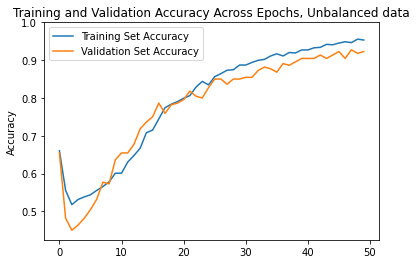

In [13]:
#evaluating
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs, Unbalanced data')
plt.legend()

##### loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs, Unbalanced data')
plt.legend()

In [14]:
y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann>0.5)
y_pred_ann

9/9 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

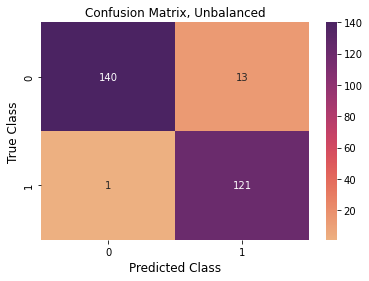

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test,y_pred_ann)

ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix, Unbalanced",fontsize=12)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred_ann)
accuracy_score

0.9490909090909091

In [17]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       153
           1       0.90      0.99      0.95       122

    accuracy                           0.95       275
   macro avg       0.95      0.95      0.95       275
weighted avg       0.95      0.95      0.95       275



## Balanced data

In [18]:
#fitting the ANN using normalized, balanced data
history2 = model.fit(X_train_smote, y_train_smote, batch_size = 8, 
                     epochs= 50, verbose=2, validation_split=0.2)

Epoch 1/50
122/122 - 0s - loss: 0.1586 - accuracy: 0.9702 - val_loss: 0.1699 - val_accuracy: 0.9631 - 465ms/epoch - 4ms/step
Epoch 2/50
122/122 - 0s - loss: 0.1508 - accuracy: 0.9754 - val_loss: 0.1600 - val_accuracy: 0.9631 - 154ms/epoch - 1ms/step
Epoch 3/50
122/122 - 0s - loss: 0.1483 - accuracy: 0.9743 - val_loss: 0.1558 - val_accuracy: 0.9631 - 154ms/epoch - 1ms/step
Epoch 4/50
122/122 - 0s - loss: 0.1455 - accuracy: 0.9754 - val_loss: 0.1608 - val_accuracy: 0.9631 - 184ms/epoch - 2ms/step
Epoch 5/50
122/122 - 0s - loss: 0.1429 - accuracy: 0.9754 - val_loss: 0.1542 - val_accuracy: 0.9672 - 164ms/epoch - 1ms/step
Epoch 6/50
122/122 - 0s - loss: 0.1403 - accuracy: 0.9774 - val_loss: 0.1527 - val_accuracy: 0.9672 - 176ms/epoch - 1ms/step
Epoch 7/50
122/122 - 0s - loss: 0.1377 - accuracy: 0.9774 - val_loss: 0.1538 - val_accuracy: 0.9672 - 185ms/epoch - 2ms/step
Epoch 8/50
122/122 - 0s - loss: 0.1349 - accuracy: 0.9764 - val_loss: 0.1504 - val_accuracy: 0.9672 - 165ms/epoch - 1ms/step


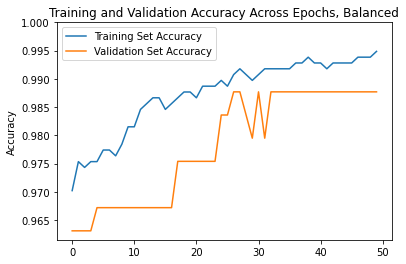

In [19]:
#evaluating
accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs, Balanced')
plt.legend()

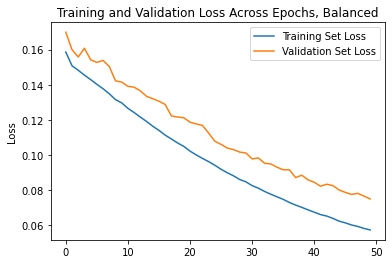

In [20]:
loss = history2.history['loss']
validation_loss = history2.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs, Balanced')
plt.legend()

In [21]:
y_pred_ann2 = model.predict(X_test)
y_pred_ann2 = (y_pred_ann2>0.5)
y_pred_ann2

9/9 [==============================] - 0s 877us/step


array([[ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

In [22]:
print(classification_report(y_test,y_pred_ann2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       153
           1       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



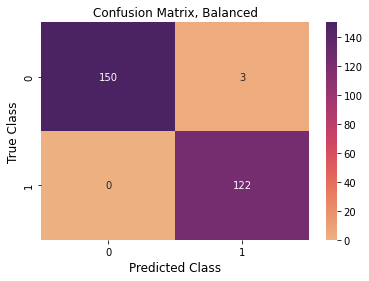

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test,y_pred_ann2)

ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix, Balanced",fontsize=12)
plt.show()